In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.graph_objects as go
import ta 
import plotly.express as px
import numpy as np

In [2]:
import pandas as pd

df = pd.read_csv(
    r"C:\Users\prana\OneDrive\Desktop\Project 1\data\cleaned_stock_data.csv",
    header=[0, 1],  # Read both header rows
    index_col=0,    # Make Date the index
    parse_dates=True
)

# Flatten multi-index columns: "Close_AAPL", "High_JPM", etc.
df.columns = ['_'.join(col).strip() for col in df.columns.values]

df.head()


Close_AAPL  Close_JPM  Close_TSLA  Close_MSFT  Close_HDFCBANK.NS  \
Date                                                                          
1/01/2019   37.617859  82.013504   20.674667   94.945503          14.539463   
2/01/2019   37.617859  82.013504   20.674667   94.945503          14.406801   
3/01/2019   33.870834  80.847954   20.024000   91.452660          14.242690   
4/01/2019   35.316761  83.828438   21.179333   95.706039          14.211724   
7/01/2019   35.238148  83.886734   22.330668   95.828117          14.391860   

           Close_RELIANCE.NS  Close_TCS.NS  High_AAPL   High_JPM  High_TSLA  \
Date                                                                          
1/01/2019           7.179480     24.638808  37.839395  82.401647  21.008667   
2/01/2019           7.085973     24.904255  37.839395  82.401647  21.008667   
3/01/2019           6.973543     24.513991  34.711709  82.329874  20.626667   
4/01/2019           6.977286     24.098827  35.385843  84.028246  21.200001   
7/01/2019           7.094233     24.640754  35.452537  84.477837  22.449333   

           ...  Open_HDFCBANK.NS  Open_RELIANCE.NS  Open_TCS.NS  Volume_AAPL  \
Date       ...                                                                 
1/01/2019  ...         14.401046          7.206700    24.550756    148158800   
2/01/2019  ...         14.503591          7.137850    24.667293    148158800   
3/01/2019  ...         14.326319          7.067672    24.759783    365248800   
4/01/2019  ...         14.196958          6.969347    24.396074    234428400   
7/01/2019  ...         14.439706          7.108681    24.561557    219111200   

           Volume_JPM  Volume_TSLA  Volume_MSFT  Volume_HDFCBANK.NS  \
Date                                                                  
1/01/2019    15670900    174879000     35329300             3186720   
2/01/2019    15670900    174879000     35329300             4067116   
3/01/2019    16286400    104478000     42579100             6385832   
4/01/2019    16935200    110911500     44060600             3643560   
7/01/2019    15430700    113268000     35656100             2693506   

           Volume_RELIANCE.NS  Volume_TCS.NS  
Date                                          
1/01/2019             9746670        1094883  
2/01/2019            15628818        2100463  
3/01/2019            16288287        2611668  
4/01/2019            18516544        4280862  
7/01/2019            12060290        1856423  

[5 rows x 35 columns]

In [3]:
def save_plot(filename, dpi=300):
    plt.savefig(filename, dpi=dpi, bbox_inches='tight')
    plt.show()


In [4]:
df.describe()

Close_AAPL    Close_JPM   Close_TSLA   Close_MSFT  Close_HDFCBANK.NS  \
count  1555.000000  1555.000000  1555.000000  1555.000000        1555.000000   
mean    134.942286   130.510819   180.755204   260.477533          17.542572   
std      54.019113    38.346156   105.163716    96.738242           2.318958   
min      33.870834    67.735397    11.931333    91.452660           9.528093   
25%      88.867771   100.676437    80.577332   193.499763          16.414452   
50%     143.229660   126.270325   202.146668   252.239487          17.957805   
75%     172.180382   145.143372   251.084999   325.129349          19.296042   
max     258.396667   246.293076   479.859985   464.002502          21.846454   

       Close_RELIANCE.NS  Close_TCS.NS    High_AAPL     High_JPM    High_TSLA  \
count        1555.000000   1555.000000  1555.000000  1555.000000  1555.000000   
mean           13.050299     37.782248   136.266543   131.726287   184.807387   
std             3.096146      8.209455    54.410028    38.538418   107.579943   
min             5.250608     19.837303    34.711709    71.780838    12.445333   
25%            10.756806     28.706385    90.201936   101.502750    81.866669   
50%            13.744356     39.329824   144.768389   127.586219   207.696671   
75%            15.129848     44.519113   173.589681   146.705784   255.334999   
max            19.113991     53.408563   259.474086   250.248884   488.540008   

       ...  Open_HDFCBANK.NS  Open_RELIANCE.NS  Open_TCS.NS   Volume_AAPL  \
count  ...       1555.000000       1555.000000  1555.000000  1.555000e+03   
mean   ...         17.547610         13.061659    37.800695  9.379641e+07   
std    ...          2.313233          3.093521     8.200905  5.223247e+07   
min    ...          9.468903          5.441556    19.242357  2.323470e+07   
25%    ...         16.414844         10.694114    28.676873  5.897220e+07   
50%    ...         17.949620         13.756476    39.401517  8.096270e+07   
75%    ...         19.294520         15.127806    44.531465  1.119380e+08   
max    ...         21.889536         19.145320    53.642019  4.265100e+08   

         Volume_JPM   Volume_TSLA   Volume_MSFT  Volume_HDFCBANK.NS  \
count  1.555000e+03  1.555000e+03  1.555000e+03        1.555000e+03   
mean   1.287822e+07  1.278719e+08  2.786639e+07        1.223071e+07   
std    6.708098e+06  8.068728e+07  1.208849e+07        1.162463e+07   
min    3.220500e+06  2.940180e+07  7.164500e+06        5.484040e+05   
25%    8.628750e+06  7.798800e+07  2.013405e+07        5.917258e+06   
50%    1.105730e+07  1.044990e+08  2.495330e+07        9.431388e+06   
75%    1.455560e+07  1.500344e+08  3.194065e+07        1.558069e+07   
max    5.441880e+07  9.140820e+08  9.701270e+07        2.226710e+08   

       Volume_RELIANCE.NS  Volume_TCS.NS  
count        1.555000e+03   1.555000e+03  
mean         1.943228e+07   2.744854e+06  
std          1.518397e+07   1.655561e+06  
min          1.705656e+06   1.548950e+05  
25%          1.047171e+07   1.716334e+06  
50%          1.493391e+07   2.316539e+06  
75%          2.210466e+07   3.225786e+06  
max          1.426834e+08   1.983933e+07  

[8 rows x 35 columns]

In [5]:
close_col=[col for col in df.columns if 'Close' in col]

In [6]:
normalised=df[close_col]/df[close_col].iloc[0]*100

In [7]:
normalised

Close_AAPL   Close_JPM   Close_TSLA  Close_MSFT  \
Date                                                          
1/01/2019   100.000000  100.000000   100.000000  100.000000   
2/01/2019   100.000000  100.000000   100.000000  100.000000   
3/01/2019    90.039240   98.578831    96.852829   96.321212   
4/01/2019    93.882964  102.212969   102.440984  100.801024   
7/01/2019    93.673986  102.284051   108.009803  100.929601   
...                ...         ...          ...         ...   
23/12/2024  676.954307  286.029865  2082.742124  456.665164   
24/12/2024  684.724442  290.733245  2235.973091  460.945895   
26/12/2024  686.898923  291.729107  2196.552897  459.665864   
27/12/2024  677.802877  289.365426  2087.869160  451.712918   
30/12/2024  668.812862  287.145713  2018.944230  445.732443   

            Close_HDFCBANK.NS  Close_RELIANCE.NS  Close_TCS.NS  
Date                                                            
1/01/2019          100.000000         100.000000    100.000000  
2/01/2019           99.087573          98.697580    101.077351  
3/01/2019           97.958844          97.131582     99.493412  
4/01/2019           97.745864          97.183715     97.808411  
7/01/2019           98.984813          98.812620    100.007896  
...                       ...                ...           ...  
23/12/2024         144.236747         200.422742    195.798830  
24/12/2024         143.744058         200.133926    196.441165  
26/12/2024         142.629369         198.385975    195.230844  
27/12/2024         143.482907         199.475945    195.380649  
30/12/2024         141.651338         197.495333    194.811010  

[1555 rows x 7 columns]

In [20]:
fig=px.line(normalised,x=normalised.index,y=normalised.columns,labels={'value':'Price (normalised)','Variable':'Stock'},title='Normalised closing prices')



fig.show()

In [9]:
returns = df[close_col].pct_change()
volatility = returns.rolling(window=30).std()

fig = px.line(volatility, x=volatility.index, y=volatility.columns,
              title="30-Day Rolling Volatility",
              labels={"value": "Volatility", "variable": "Stock"})
fig.show()

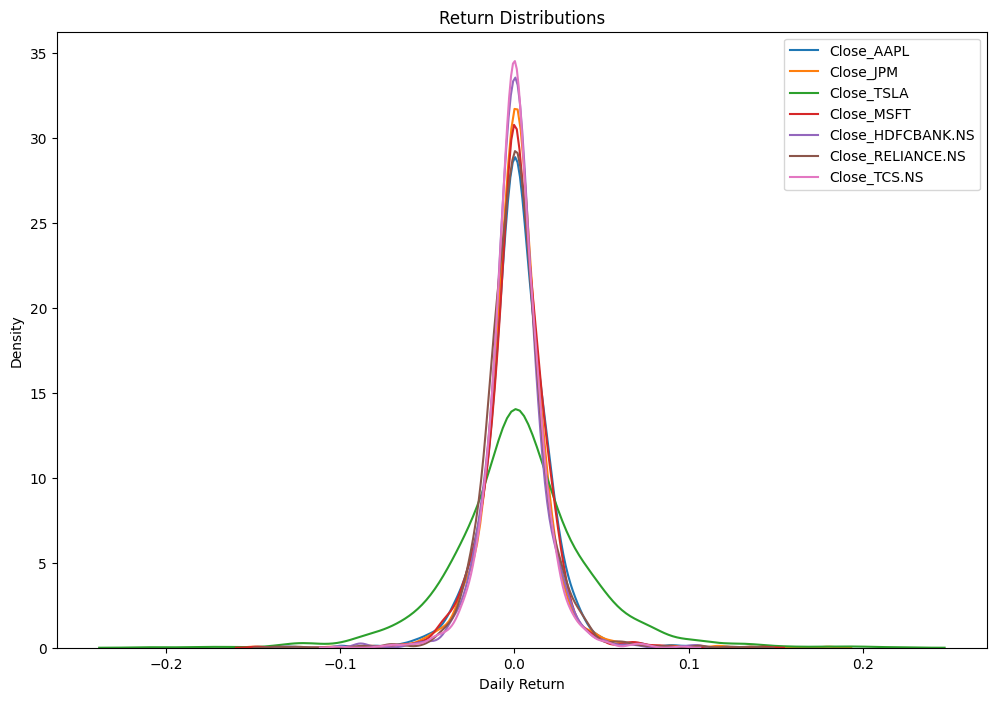

In [10]:
plt.figure(figsize=(12,8))
for col in close_col:
    sns.kdeplot(returns[col].dropna(), label=col)
plt.title("Return Distributions")
plt.xlabel("Daily Return")
plt.ylabel("Density")
plt.legend()
save_plot("Return Distributions.png")

plt.show()



In [11]:
# Kernel desnity Estimate- 
# This is also used to check for volatility of a stock from which risk can be assessed, 
# mostly every stock is giving return close to 0 percent also tesla here is the most volatile stock

In [12]:
import plotly.graph_objects as go

# Extract stock names dynamically
stocks = list(set(col.split("_")[1] for col in df.columns if col.startswith("Close")))

# -------------------------------
# Function to generate SMA + crossover signals
# -------------------------------
def plot_candlestick_with_sma(stock):
    candlestick_df = df[[f"Open_{stock}", f"High_{stock}", f"Low_{stock}", f"Close_{stock}"]].copy()
    
    # Calculate SMAs
    candlestick_df["SMA20"] = candlestick_df[f"Close_{stock}"].rolling(window=20).mean()
    candlestick_df["SMA50"] = candlestick_df[f"Close_{stock}"].rolling(window=50).mean()
    
    # Identify signals
    candlestick_df["Signal"] = 0
    candlestick_df.loc[candlestick_df.index[20:], "Signal"] = (
        (candlestick_df["SMA20"].iloc[20:] > candlestick_df["SMA50"].iloc[20:]).astype(int)
    )
    
    candlestick_df["Crossover"] = candlestick_df["Signal"].diff()

    # Plot candlestick + SMAs + signals
    fig = go.Figure(data=[
        go.Candlestick(x=candlestick_df.index,
                       open=candlestick_df[f"Open_{stock}"],
                       high=candlestick_df[f"High_{stock}"],
                       low=candlestick_df[f"Low_{stock}"],
                       close=candlestick_df[f"Close_{stock}"],
                       name="Candlestick"),
        go.Scatter(x=candlestick_df.index, y=candlestick_df["SMA20"],
                   line=dict(color='blue', width=1), name="SMA20"),
        go.Scatter(x=candlestick_df.index, y=candlestick_df["SMA50"],
                   line=dict(color='orange', width=1), name="SMA50"),
        go.Scatter(
            x=candlestick_df.index[candlestick_df["Crossover"]==1],
            y=candlestick_df[f"Close_{stock}"][candlestick_df["Crossover"]==1],
            mode="markers", marker=dict(color="green", size=10, symbol="triangle-up"),
            name="Bullish Crossover"
        ),
        go.Scatter(
            x=candlestick_df.index[candlestick_df["Crossover"]==-1],
            y=candlestick_df[f"Close_{stock}"][candlestick_df["Crossover"]==-1],
            mode="markers", marker=dict(color="red", size=10, symbol="triangle-down"),
            name="Bearish Crossover"
        )
    ])

    fig.update_layout(title=f"{stock} Candlestick with SMA20 & SMA50",
                      xaxis_rangeslider_visible=False)

    
    fig.show()

# -------------------------------
# Loop through all stocks
# -------------------------------
for stock in stocks:
    plot_candlestick_with_sma(stock)


In [13]:
volume_cols = [col for col in df.columns if col.startswith("Volume")]
fig = px.line(df[volume_cols], x=df.index, y=volume_cols,
              title="Trading Volume Trends",
              labels={"value": "Volume", "variable": "Stock"})

fig.show()

In [14]:
log_returns = np.log(df[close_col] / df[close_col].shift(1)) # log return is used as it is additive over multi day and provides symmetry
log_returns.columns=log_returns.columns.str.replace('Close_','')



In [15]:
percentiles=log_returns.quantile([0.05,0.25,0.75,0.95])
stats_summ = pd.DataFrame({
    'Mean': log_returns.mean(),
    'Median': log_returns.median(),
    'Std Dev': log_returns.std(),
    'Skewness': log_returns.skew(),
    'Kurtosis': log_returns.kurt(),
    '5%': percentiles.loc[0.05],
    '25%': percentiles.loc[0.25],
    '75%': percentiles.loc[0.75],
    '95%': percentiles.loc[0.95]
}).round(4)
stats_summ.index=stats_summ.index.str.replace('Close_',"")
stats_summ


Mean  Median  Std Dev  Skewness  Kurtosis      5%     25%  \
AAPL         0.0012  0.0008   0.0191   -0.2281    5.9540 -0.0296 -0.0076   
JPM          0.0007  0.0004   0.0190   -0.0056   14.0280 -0.0274 -0.0077   
TSLA         0.0019  0.0013   0.0399   -0.1314    3.8174 -0.0604 -0.0176   
MSFT         0.0010  0.0008   0.0180   -0.3055    8.2311 -0.0275 -0.0072   
HDFCBANK.NS  0.0002  0.0004   0.0168   -0.3433    8.7091 -0.0246 -0.0075   
RELIANCE.NS  0.0004  0.0004   0.0185   -0.0172    9.4367 -0.0257 -0.0092   
TCS.NS       0.0004  0.0004   0.0156   -0.1718    4.8988 -0.0235 -0.0071   

                75%     95%  
AAPL         0.0115  0.0286  
JPM          0.0090  0.0257  
TSLA         0.0207  0.0642  
MSFT         0.0103  0.0264  
HDFCBANK.NS  0.0078  0.0255  
RELIANCE.NS  0.0092  0.0281  
TCS.NS       0.0084  0.0239

In [16]:
us_stocks=['AAPL','MSFT','TSLA']
indian_stocks=['RELIANCE.NS','TCS.NS','HDFCBANK.NS']
log_returns

AAPL       JPM      TSLA      MSFT  HDFCBANK.NS  RELIANCE.NS  \
Date                                                                           
1/01/2019        NaN       NaN       NaN       NaN          NaN          NaN   
2/01/2019   0.000000  0.000000  0.000000  0.000000    -0.009166    -0.013110   
3/01/2019  -0.104925 -0.014314 -0.031978 -0.037482    -0.011457    -0.015994   
4/01/2019   0.041803  0.036202  0.056094  0.045460    -0.002177     0.000537   
7/01/2019  -0.002228  0.000695  0.052935  0.001275     0.012596     0.016622   
...              ...       ...       ...       ...          ...          ...   
23/12/2024  0.003060  0.003319  0.022404 -0.003097     0.020444     0.017935   
24/12/2024  0.011413  0.016310  0.070991  0.009330    -0.003422    -0.001442   
26/12/2024  0.003171  0.003419 -0.017787 -0.002781    -0.007785    -0.008772   
27/12/2024 -0.013331 -0.008135 -0.050745 -0.017453     0.005966     0.005479   
30/12/2024 -0.013352 -0.007701 -0.033569 -0.013328    -0.012847    -0.009979   

              TCS.NS  
Date                  
1/01/2019        NaN  
2/01/2019   0.010716  
3/01/2019  -0.015795  
4/01/2019  -0.017081  
7/01/2019   0.022239  
...              ...  
23/12/2024  0.001047  
24/12/2024  0.003275  
26/12/2024 -0.006180  
27/12/2024  0.000767  
30/12/2024 -0.002920  

[1555 rows x 7 columns]

In [17]:
us_vol=log_returns[us_stocks].std().mean()
ind_vol=log_returns[indian_stocks].std().mean()
print(f"Average Volatality of US Stocks:{us_vol:.4f}")
print(f"Average Volatality of Indian Stocks:{ind_vol:.4f}")

Average Volatality of US Stocks:0.0257
Average Volatality of Indian Stocks:0.0170


In [18]:
us_corr=log_returns[us_stocks].corr().abs().values
ind_corr=log_returns[indian_stocks].corr().abs().values
us_corr_mean=(us_corr.sum()-len(us_stocks))/((len(us_stocks)*(len(us_stocks)-1)))
ind_corr_mean=(ind_corr.sum()-len(indian_stocks))/((len(indian_stocks)*(len(indian_stocks)-1)))
print(f"Avg Internal Correlation (US): {us_corr_mean:.4f}")
print(f"Avg Internal Correlation (India): {ind_corr_mean:.4f}")

Avg Internal Correlation (US): 0.5506
Avg Internal Correlation (India): 0.3980


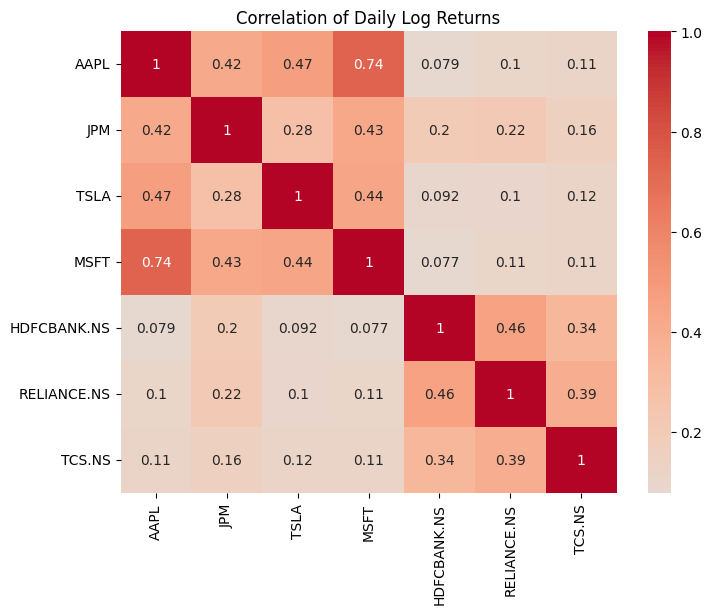

Text(0.5, 1.02, 'Pairwise Relationships of Log Returns')

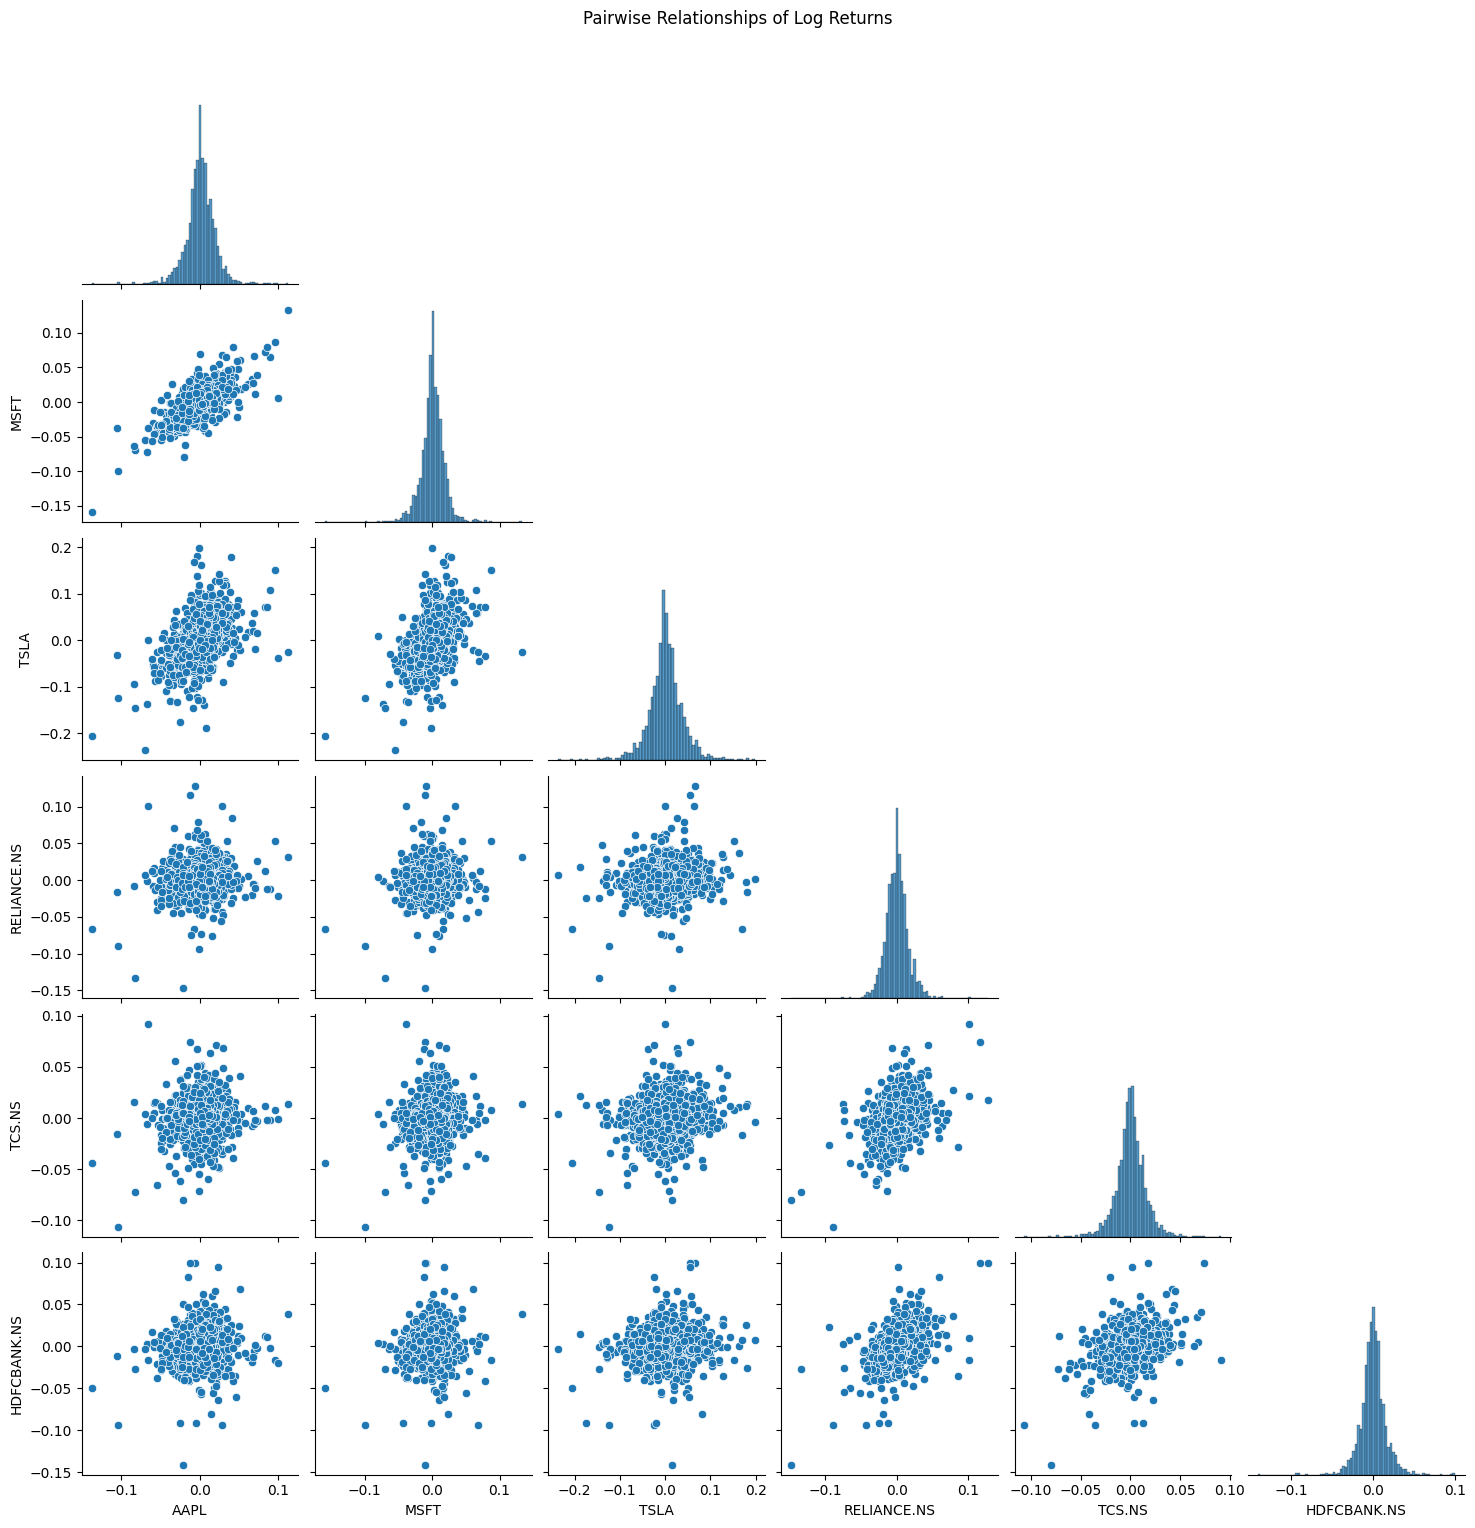

In [19]:
corr = log_returns.corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation of Daily Log Returns")
save_plot("Correlation of Daily Log Returns.png")

plt.show()

sns.pairplot(log_returns[us_stocks + indian_stocks], corner=True)
plt.suptitle("Pairwise Relationships of Log Returns", y=1.02)



## 📊 Final EDA Inferences

**Universe:** AAPL, JPM, TSLA, MSFT, HDFCBANK.NS, RELIANCE.NS, TCS.NS (daily log returns)

### Key distribution stats
- **Volatility (Std Dev, daily):** TSLA 0.0399 (highest) … TCS 0.0156 (lowest).
- **Mean daily returns:** TSLA 0.0019 > AAPL 0.0012 > MSFT 0.0010; Indian stocks ~0.0002–0.0004.
- **Skewness:** slightly negative for most (downside bias).
- **Kurtosis (tail risk):** JPM 14.03 (very fat tails); RELIANCE 9.44; HDFCBANK 8.71; MSFT 8.23; AAPL 5.95; TCS 4.90; TSLA 3.82.

**Typical day thresholds (95% / 5%):**  
TSLA +6.42% / −6.04% | AAPL +2.86% / −2.96% | MSFT +2.64% / −2.75% | JPM +2.57% / −2.74% | RELIANCE +2.81% / −2.57% | HDFCBANK +2.55% / −2.46% | TCS +2.39% / −2.35%

### Group comparison
- **Avg volatility:** US (AAPL, MSFT, TSLA) 0.0257 vs **India** (RELIANCE, TCS, HDFCBANK) 0.0170.
- **Avg internal correlation (fixed):** **US ≈ 0.55**, **India ≈ 0.40**.  
  Cross-market correlation is low ⇒ mixing US + India improves diversification.

### Takeaways
1. **TSLA = high visible risk**; **JPM = high tail risk**.  
2. **US basket**: higher risk and higher upside; **India basket**: calmer but still fat tails.  
3. **Diversification works best across regions** (US ↔ India) given low cross-correlation.  
4. For portfolio work, combine volatility and tail risk (e.g., VaR/CVaR) rather than volatility alone.
